# Atividade Avaliativa - N02

Considere a empresa FabProd responsável por fabricar e distribuir uma família de produtos de limpeza de veículos para região Sul do Brasil. No entanto, o CEO dessa empresa não tem conhecimento do quanto a FabProd pode expandir a distribuição nessa região e nas demais regiões do Brasil.
O CEO tem apenas informações sobre as vendas oriundas do ERP, e está interessado em conhecer melhor as possibilidades de expansão dos negócios para a FabProd. Ele sabe que existe uma área multidisciplinar (ciência de dados) que pode ajudá-lo, mas ele não sabe como.

- Considerando esse cenário, faça uma demonstração utilizando **dados sintéticos** como um exemplo de um conjunto de possibilidades. Para esse cenário, inclua aspectos da **Análise Exploratória de Dados** e um modelo preditivo (disciplina AM).
- Por outro lado, esclareça que a FabProd precisa valorizar os dados que são gerados internamente e externamente da cadeia produtiva em que a FabProd está inserida (se precisar utilize a metodologia CRISP-DM).

### Criando os dados para analisarmos

Inicialmente precisamos criar dados que recebos do ERP para fazer nossa Análise Exploratória de Dados, para isso podemos rodar o arquivo `generate_data.py` que criará um arquivo `data.csv` com 1000 compras.

### Instalação e importação das bibliotecas necessárias

In [1]:
pip install pandas matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Agora com as bibliotecas instaladas e importadas, podemos importar os dados e começar a analisá-los

In [3]:
df = pd.read_csv("./data.csv")
df.head()

,id,date_time,state,quantity,product,unit_price,total_price
0,99d57a23-39b4-487c-873e-87db98909521,03/23/2023 03:02:50,rio grande do sul,55,removedor de insetos,19.9,1094.5
1,e55a0b92-52a0-40ae-9c00-36d1c3880716,01/26/2023 16:47:26,rio grande do sul,8,polidor de metais automotivo,39.9,319.2
2,59312d86-dd98-405d-9ff5-c3bb3293e96f,02/04/2023 19:10:22,paraná,68,limpa-tapetes automotivo,34.9,2373.2
3,84acdcec-c58c-42f5-9a3f-0388b472bc07,03/27/2023 13:14:36,rio grande do sul,17,removedor de insetos,19.9,338.3
4,eaff696f-edea-4877-970e-ee2f288d48fb,03/15/2023 14:52:17,rio grande do sul,34,cera automotiva,39.9,1356.6


Agora com o dataframe carregado podemos começar a analisar os dados.

### Vendas por mês

Levando em consideração que esse dataset só contém os dados do primeiro quadrimestre de 2023, vamos primeiro analisar a quantidade de vendas por mês por meio de um gráfico de barras.

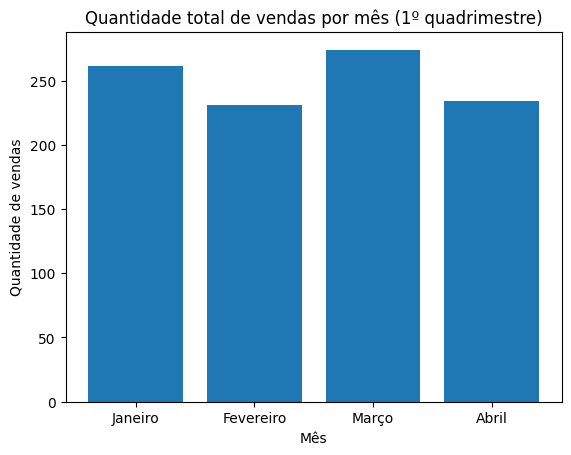

In [4]:
df["month"] = pd.to_datetime(df["date_time"]).dt.month
sales_by_month = df.groupby("month").size()

plt.bar(sales_by_month.index, sales_by_month.values)
plt.title("Quantidade total de vendas por mês (1º quadrimestre)")
plt.xlabel("Mês")
plt.ylabel("Quantidade de vendas")
plt.xticks(sales_by_month.index, ["Janeiro", "Fevereiro", "Março", "Abril"])
plt.show()

Analisando o gráfico acima, podemos notas que as vendas de todos os meses foram bem semelhantes, sendo o mês com mais vendas o de março e o com menos o de fevereiro.

Agora vamos analisar separar também pelos produtos.

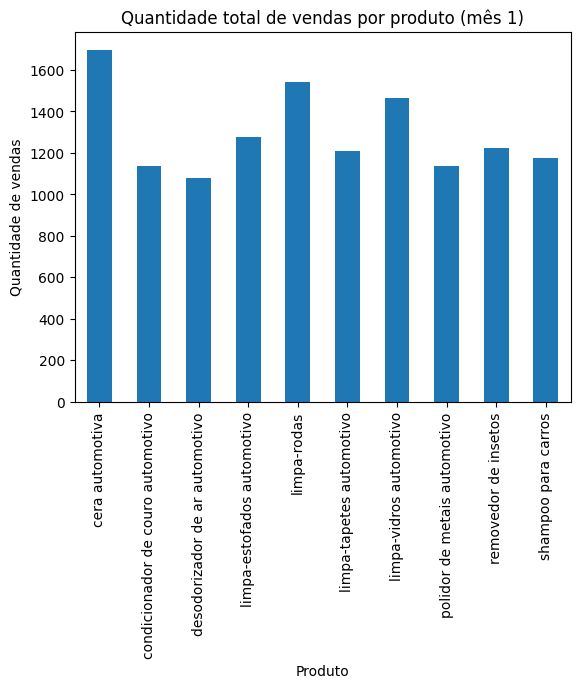

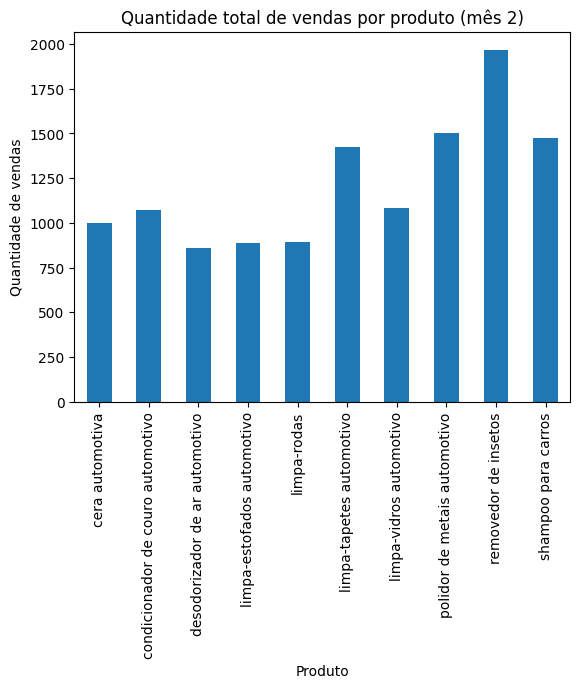

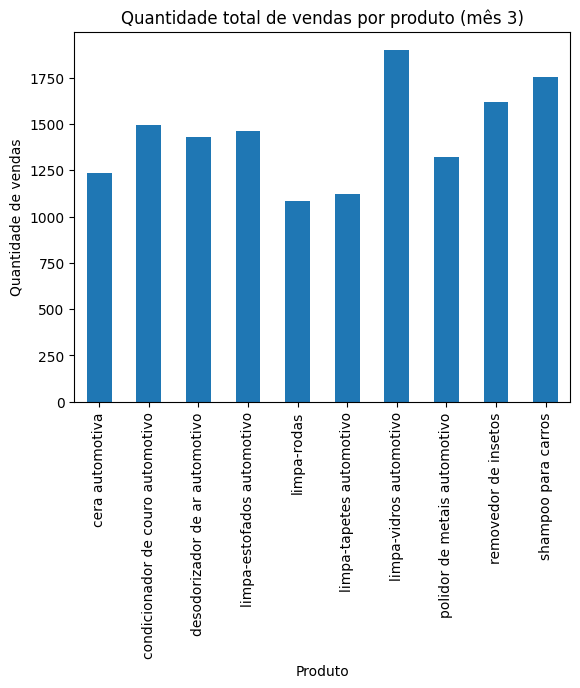

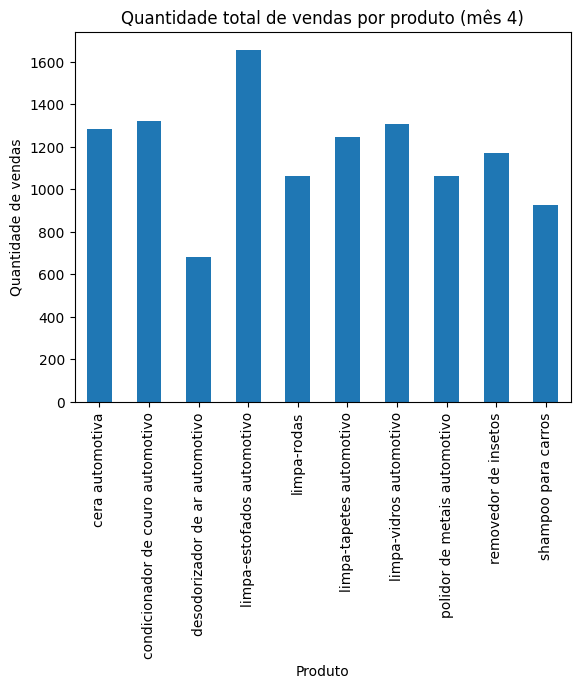

In [24]:
for month in [1, 2, 3, 4]:
    df_month = df.loc[df["month"] == month]

    total_sales = df_month.groupby("product")["quantity"].sum()
    total_sales.plot.bar()
    plt.title('Quantidade total de vendas por produto (mês {})'.format(month))
    plt.xlabel('Produto')
    plt.ylabel('Quantidade de vendas')
    plt.show()

Analisando os gráficos acima podemos concluir que o produto mais vendido varia a cada mês,porém o menos vendido é o mesmo em janeiro, fevereiro e abril.
Sendo o mais e o menos vendido por mês:


|               | Mais vendido               | Menos vendido                  |
|---------------|----------------------------|--------------------------------|
| **Janeiro**   | cera automotiva            | desodorizador de ar automotivo |
| **Fevereiro** | removedor de insetos       | desodorizador de ar automotivo |
| **Março**     | limpa-vidros automotivo    | limpa-rodas                    |
| **Abril**     | limpa-estofados automotivo | desodorizador de ar automotivo |

Agora vamos ver as vendas por estados.

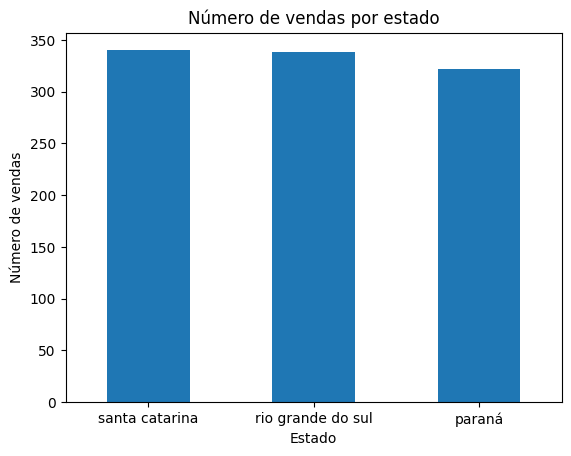

In [30]:
state_count = df["state"].value_counts()
state_count.plot.bar()

plt.title('Número de vendas por estado')
plt.xlabel('Estado')
plt.ylabel('Número de vendas')
plt.xticks(rotation=0)
plt.show()

Podemos concluir com esse gráfico que Santa Catarina e Rio Grande do Sul tem um número de vendas quase igual, porém o Paraná está um pouco abaixo dos dois.